In [1]:
import numpy as np
#from scipy.interpolate import RectBivariateSpline
import scipy.interpolate as interpolate
import datetime as dt
import os
from copy import deepcopy as cp
import netCDF4 as nc
import sys
from dask import delayed
import matplotlib
import matplotlib.pyplot as plt
#import warnings
# Import writer class from csv module
from csv import writer
import xarray as xr
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

In [2]:
#SCENARIO_COMBNATION = ['frst-ctl','crop-ctl']
SCENARIO_COMBNATION = ['crop-ctl','frst-ctl','irri-crop']
scenario_title=['CROP-CTL','FRST-CTL','IRR-CROP']
# MODEL = ['mpiesm', 'cesm', 'ecearth'] #, "cesm" "ecearth" "mpiesem"
# CMOR_TABLE="Eyr"  # "Lmon" "LImon" "Emon" "Lmon" "Eyr" "Lmon"; choose "cesm" for all cesm variables as they are currently stored in /scratch/b/b380948/signal_separation/cesm_output/
# CMOR_VAR_table=['tas', 'tas-distribution', 'cLand'] #ah cesm model output data used with cesm table
region_list= ['NAM', 'SEAS', 'CAF', 'SAF']
region_name = [
    "WNA",  # Western North America   
    "EC",  # Eastern China
    "CCB",  # Central Congo Basin
    "SCP"  # Southern Congo Periphery
]
#['NAM', 'SEAS', 'CAF', 'SAF']
#SCENARIO_COMBNATION = ['frst-ctl']
#region_list= ['NAM']
number = ['a','b','c','d','e','f','g','h','i','j','k','l']

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


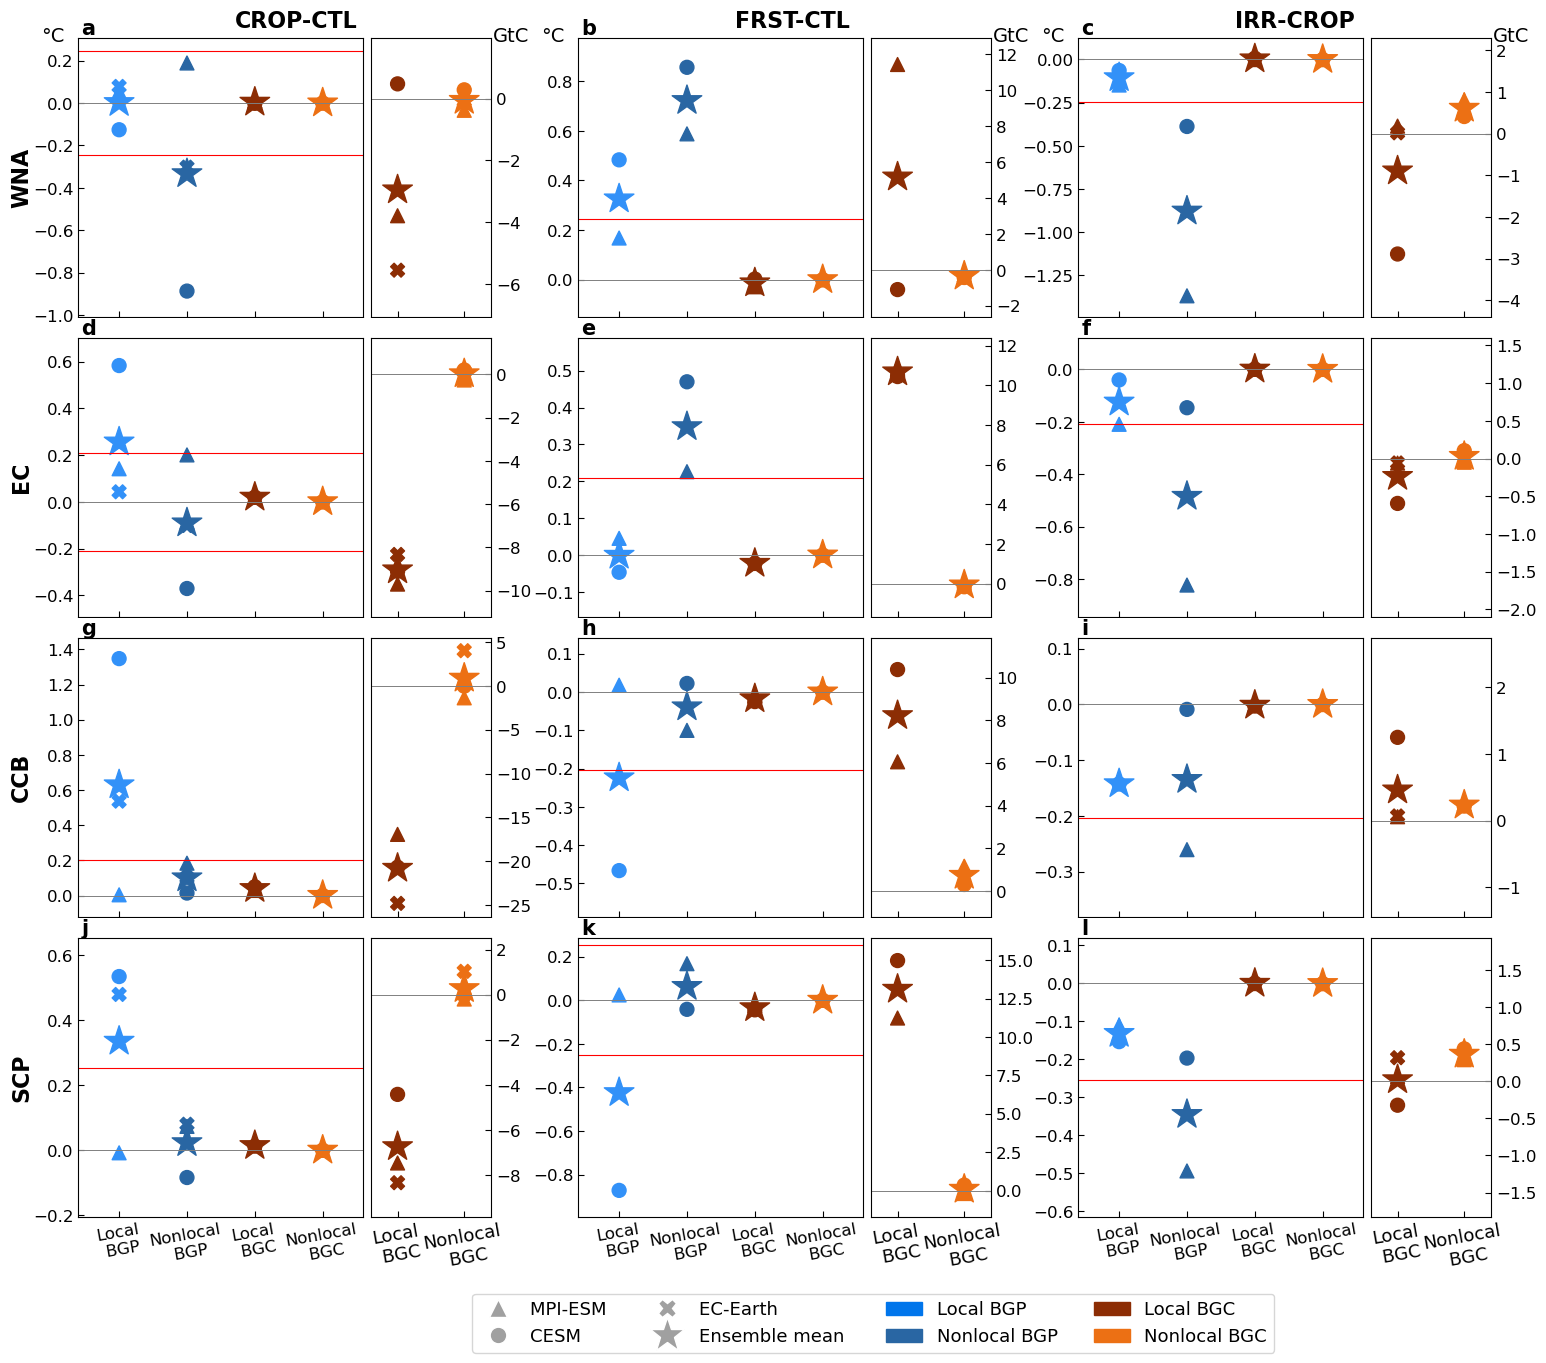

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [3]:
fig = plt.figure(constrained_layout= False)
#fig.subplots_adjust(wspace= 10, hspace= 0)
subfigs = fig.subfigures(4, 3,  wspace= 0, hspace= 0.025)
#subfigs.layout(None)
#subfigs.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout(pad= 0)
fig.set_size_inches(15, 12)
for j, SCENARIO in enumerate(SCENARIO_COMBNATION):
#for SCENARIO in ['crop-ctl']:
#mv $SCRATCH/TCRE/GLOBAL/cLand_${SCENARIO}_mpiesm_Lut_last30mean_chname_GLOBAL_invertlat.nc $SCRATCH/TCRE/GLOBAL/cLand_${SCENARIO}_mpiesm_Lut_last30mean_chname_GLOBAL.nc
 for i, region_source in enumerate(region_list):
    #ensemble_cland = xr.open_dataset('/work/bm1147/b380949/web-monitoring/secP/cLand_ensemble/' + 'cland_' + SCENARIO + '_last30mean_3models-ensemble.nc')
    mpiesm_cland_dir_GHG = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/Lutdata/TCRE/perarea/' + region_source + \
    '/tas_fldmean_' + SCENARIO + '_mpiesm_Lut_last30mean_chname_' + region_source + '_' + region_source + '.nc')
     # the direct AFOLU emission(local BGC effects) of $region_source impact its own regional mean temperature via GHG effect 
    mpiesm_cland_dir_GHG_onglobal = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/Lutdata/TCRE/perarea/' + region_source + \
    '/tas_fldmean_' + SCENARIO + '_mpiesm_Lut_last30mean_chname_' + region_source + '_' + 'GLOBAL' + '.nc')
     # the direct AFOLU emission(local BGC effects) of CSAM impact $region_source 's regional mean temperature via GHG effect
    mpiesm_cland_dir_GHG_global_nonlocal = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/Lutdata/TCRE/perarea/GLOBAL' + \
    '/tas_fldmean_' + SCENARIO + '_mpiesm_Lut_last30mean_chname_' + 'GLOBAL' + '_' + region_source + '.nc')
     # global nonlocal BGC effects induced emission impact $region_source 's regional mean temperature via GHG effect
    
    mpiesm_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/Lutdata/TCRE/perarea/' + region_source + \
    '/Eluc_' + SCENARIO + '_mpiesm_Lut_last30mean_chname_' + region_source + '.nc')
     # mpiesm_cland_dir_cLand.cLand_local.values[0][0][0]*-1000: the direct AFOLU emission(regional integrated local BGC effects) of $region_source;
     # mpiesm_cland_dir_cLand.cLand_nonlocal.values[0][0][0]*-1000:the regional integrated nonlocal BGC effect of $region_sources(caused by the global AFOLU induced nonlocal BGP effects on this unchanged region-$region_source) 
    mpiesm_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/MPI-PLOT/climate/regional_mean/' + \
    'tas_fldmean_' + SCENARIO + '_mpiesm_ensmean_signal-separated_' + region_source + '.nc')
    #mpiesm_bgp_dir_tas.tas_local.values[0][0][0]: AFOLU of $region_source induced $region_source 's regional mean temperature change via local BGP effects
    #mpiesm_bgp_dir_tas.tas_nonlocal.values[0][0][0]: global AFOLU induced $region_source(intact) 's regional mean temperature change via nonlocal BGP effects
    cesm_cland_dir_GHG= xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/final_Lunit/RTCRE_regional/perarea/' + region_source + \
    '/tas_fldmean_' + SCENARIO + '_cesm_last30mean_' + region_source + '_' + region_source + '.nc')
    cesm_cland_dir_GHG_onglobal= xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/final_Lunit/RTCRE_regional/perarea/' + region_source + \
    '/tas_fldmean_' + SCENARIO + '_cesm_last30mean_' + region_source + '_GLOBAL' + '.nc')
    cesm_cland_dir_GHG_global_nonlocal= xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/final_Lunit/RTCRE_regional/perarea/GLOBAL' + \
    '/tas_fldmean_' + SCENARIO + '_cesm_last30mean_' + 'GLOBAL' + '_' + region_source + '.nc')
    cesm_cland_dir_cLand= xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/final_Lunit/RTCRE_regional/perarea/' + region_source + \
    '/Eluc_' + SCENARIO + '_cesm_last30mean_' + region_source + '.nc')

    if SCENARIO == 'irri-crop':
        cesm_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/harv_cli/final/regional_mean/' + \
                                           '/TREFHT_fldmean_irr-crop_cesm_ensmean_signal-separated_'  + region_source + '.nc')
        ecearth_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/climate/regional_mean/' + \
                                              '/2t_fldmean_irr-crop_ecearth_ensmean_signal-separated_'  + region_source + '_chname.nc')
        ecearth = [np.nan,np.nan,np.nan,np.nan]
        ecearth_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/RTCRE_regional/perarea/' + region_source + \
        '/Eluc_' + SCENARIO + '_ecearth_last30mean_gridlevelsep_' + region_source + '.nc')
        ecearth2 = [ecearth_cland_dir_cLand.cLand_local.values[0][0][0]*-1000, np.nan]
    else:
        if SCENARIO == 'frst-ctl':
            cesm_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/harv_cli/final/regional_mean/' + \
                                           '/TREFHT_fldmean_' + SCENARIO + '_cesm_ensmean_signal-separated_'  + region_source + '.nc')
            ecearth_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/climate/regional_mean/' + \
                                              '/2t_fldmean_' + SCENARIO + '_ecearth_ensmean_signal-separated_'  + region_source + '_chname.nc')
            ecearth = [np.nan,np.nan,np.nan,np.nan]
   
            ecearth_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/RTCRE_regional/perarea/' + region_source + \
            '/Eluc_' + SCENARIO + '_ecearth_last30mean_gridlevelsep_' + region_source + '.nc')
            ecearth2 = [np.nan,np.nan]
        else:
            cesm_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/CESM/plot/harv_cli/final/regional_mean/' + \
                                           '/TREFHT_fldmean_' + SCENARIO + '_cesm_ensmean_signal-separated_'  + region_source + '.nc')
            ecearth_bgp_dir_tas = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/climate/regional_mean/' + \
                                              '/2t_fldmean_' + SCENARIO + '_ecearth_ensmean_signal-separated_'  + region_source + '_chname.nc')
            ecearth = [ecearth_bgp_dir_tas.tas_local.values[0][0][0],ecearth_bgp_dir_tas.tas_nonlocal.values[0][0][0],np.nan,np.nan]

            ecearth_cland_dir_cLand = xr.open_dataset('/work/bm1147/b380949/web-monitoring/ecearth_plot/RTCRE_regional/perarea/' + region_source + \
            '/Eluc_' + SCENARIO + '_ecearth_last30mean_gridlevelsep_' + region_source + '.nc')
            ecearth2 = [ecearth_cland_dir_cLand.cLand_local.values[0][0][0]*-1000, ecearth_cland_dir_cLand.cLand_nonlocal.values[0][0][0]*-1000]
            
    mpiesm = [mpiesm_bgp_dir_tas.tas_local.values[0][0][0], mpiesm_bgp_dir_tas.tas_nonlocal.values[0][0][0], mpiesm_cland_dir_GHG.tas_local.values[0][0][0], \
        mpiesm_cland_dir_GHG_global_nonlocal.tas_nonlocal.values[0][0][0]]
    mpiesm2 = [mpiesm_cland_dir_cLand.cLand_local.values[0][0][0]*-1000, mpiesm_cland_dir_cLand.cLand_nonlocal.values[0][0][0]*-1000]
    cesm2 = [cesm_cland_dir_cLand.cLand_local.values[0][0][0]*-1000, cesm_cland_dir_cLand.cLand_nonlocal.values[0][0][0]*-1000]
    cesm = [cesm_bgp_dir_tas.TREFHT_local.values[0][0][0],cesm_bgp_dir_tas.TREFHT_nonlocal.values[0][0][0], cesm_cland_dir_GHG.tas_local.values[0][0][0], \
    cesm_cland_dir_GHG_global_nonlocal.tas_nonlocal.values[0][0][0]]
    ensemble_arr=[cesm,mpiesm,ecearth]
    ensemble_arr2=[cesm2,mpiesm2,ecearth2] 
    ensemble= np.nanmean(ensemble_arr,axis=0)
    ensemble2= np.nanmean(ensemble_arr2,axis=0)
     
    colors = ['#3291F8', '#2966A3', '#8C2D04', '#EC7014']
    color2 = ['#8C2D04', '#EC7014']
    if region_source =='SAF':
        labels = ['Local\n BGP','Nonlocal\n BGP','Local\n BGC','Nonlocal\n BGC']
        label2 = ['Local\n BGC','Nonlocal\n BGC']
    else:
        labels = ['','','','']
        label2 = ['','']
    x = [1,1.25,1.5,1.75]  # the label locations
    x2 = [1.25,1.75]

    subfig = subfigs[i,j]
    #plt.set_position([0.3*j+0.005, 0.995-0.3*i, 0.3, 0.3])
    ax1, ax2 = subfig.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1.2]})
    #plt.subplots_adjust(wspace=0.05, hspace=0.05)
    ax1.set_position([0.00, 0.005, 0.57, 0.93])
    ax2.set_position([0.585, 0.005, 0.24, 0.93])
    #fig.tight_layout(pad=0.0)
    plt.figure(figsize=(10, 6))
    ax1.text(0.01, 1.07,number[3*i+j] , fontsize=15, rotation=0,fontweight='bold',
         verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes)
    if j==0:
        ax1.text(-0.24, 0.5, region_name[i], fontsize=16, rotation=90,fontweight='bold',
         verticalalignment='center', horizontalalignment='left', transform=ax1.transAxes)
        #ax1.set_ylabel(region_source,fontsize = 20,labelpad=0.5)
    else:
        ax1.text(-0.02, 0.5, None, fontsize=14, rotation=90,
         verticalalignment='center', horizontalalignment='left', transform=ax1.transAxes)
        ax1.set_ylabel(None)
    if i==0:
        ax1.text(0.55, 1.06, scenario_title[j], fontsize=16, rotation=0,fontweight='bold',
         verticalalignment='center', horizontalalignment='left', transform=ax1.transAxes)
        
        ax1.text(-0.13, 1.04,'°C' , fontsize=14, rotation=0,
         verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes)
        ax2.text(1.32, 1.04,'GtC' , fontsize=14, rotation=0,
         verticalalignment='top', horizontalalignment='right', transform=ax2.transAxes)
        #ax1.set_ylabel('$^\circ$C',fontsize = 20,labelpad=-0.01, loc='top', rotation=0)
        #ax2.set_ylabel('GtC',fontsize = 20,labelpad=-0.01, loc='top', rotation=0)
        #ax2.yaxis.set_label_position('right')
    else: 
        subfig.suptitle(None)
        ax1.set_ylabel(None)
        ax2.set_ylabel(None)
    # #subfig.figure(figsize=(10, 6))
    # ax1, ax2 = fig1.add_subplot(1,2,gs[0, 0])  # First subplot inside ax
    # #ax2 = fig1.add_subplot(gs[0, 1])  # Second subplot inside a 
    # ax1, ax2 = ax.subplots(1, 2, layout='constrained', figsize=(10,6), gridspec_kw={'width_ratios': [3, 1]})
    rects3 = ax1.scatter(x, cesm, marker= 'o', s=100, color=colors, label='cesm')
    rects5 = ax1.scatter(x, ecearth, marker= 'X',s=100, color=colors, label='ecearth')        
    rects1 = ax1.scatter(x , mpiesm,marker= '^', s=100, color=colors, label='mpiesm')
    rects10 = ax1.scatter(x, ensemble, marker= '*', s=500, color=colors, label='mean')
    all_values_ax1 = np.concatenate([mpiesm,cesm,ecearth,ensemble])
    all_values_ax1 = all_values_ax1[np.isfinite(all_values_ax1)]
    ax1.set_ylim([np.min(all_values_ax1) -0.12, np.max(all_values_ax1) +0.12])
    #ax1.set_ylabel('$^\circ$C',fontsize = 20,labelpad=0.5)
    ax1.tick_params(axis='y', direction='in', length=4, labelsize=12)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13,rotation=10)
    ax1.axhline(0, color='grey', linewidth=0.7)
    ax1.margins(x=0.2)
    if region_source == 'NAM':
     ax1.axhline(0.245,color='red',linewidth = 0.8)
     ax1.axhline(-0.245,color='red',linewidth = 0.8)
    else:
        if region_source == 'CAF':
         ax1.axhline(0.204,color='red',linewidth = 0.8)
         ax1.axhline(-0.204,color='red',linewidth = 0.8)
        else:
            if region_source == 'SAF':
             ax1.axhline(0.253,color='red',linewidth = 0.8)
             ax1.axhline(-0.253,color='red',linewidth = 0.8)
            else:
                if region_source == 'SEAS':
                 ax1.axhline(0.209,color='red',linewidth = 0.8)
                 ax1.axhline(-0.209,color='red',linewidth = 0.8)                              
  #  else:
    rects9 = ax2.scatter(x2 , cesm2,marker= 'o', s=100, color=color2, label='cesm')
    rects7 = ax2.scatter(x2 , mpiesm2,marker= '^',s=100, color=color2, label='mpiesm')
    rects11 = ax2.scatter(x2 , ecearth2,marker= 'X',s=100, color=color2, label='ecearth') 
    rects12 = ax2.scatter(x2, ensemble2, marker= '*', s=500, color=color2, label='mean') 
    all_values_ax2 = np.concatenate([mpiesm2,cesm2,ecearth2,ensemble2])
    all_values_ax2 = all_values_ax2[np.isfinite(all_values_ax2)]
    ax2.set_ylim([np.min(all_values_ax2) -1.5, np.max(all_values_ax2) +1.5])
    #ax2.set_ylabel('GtC',fontsize = 20,labelpad=1)
    #ax2.yaxis.set_label_position('right')  # This moves the label to the right
    # Move yticks to the right
    ax2.tick_params(axis='y', direction='in', length=4, labelsize=12, labelleft=False, labelright=True,right=True, left=False)
    ax2.set_xticks(x2)
    ax2.tick_params(axis='x', direction='in', length=4, labelsize=12)
    ax1.tick_params(axis='x', direction='in', length=4, labelsize=12)
    ax2.set_xticklabels(label2, fontsize=13,rotation=10)
    ax2.margins(x=0.4)
    ax2.axhline(0, color='grey', linewidth=0.7)
legend_elements = [Line2D([0], [0], marker='^', color='w', label='MPI-ESM ',markerfacecolor='#A0A0A0', markersize=13),
                   Line2D([0], [0], marker='o', color='w', label='CESM ', markerfacecolor='#A0A0A0', markersize=12),
                   Line2D([0], [0], marker='X', color='w', label='EC-Earth ',markerfacecolor='#A0A0A0', markersize=13),
                   Line2D([0], [0], marker='*', color='w', label='Ensemble mean ', markerfacecolor='#A0A0A0', markersize=26),
                   Patch(color='#0075EB', label='Local BGP'),
                   Patch(color='#2966A3', label='Nonlocal BGP'),
                   Patch(color='#8C2D04', label='Local BGC'),
                   Patch(color='#EC7014', label='Nonlocal BGC')
                  ] 
font_properties = FontProperties()
font_properties.set_family('serif')  # Set font family
font_properties.set_name('Times New Roman')  # Specific font name
#font_properties.set_weight('bold')  # Set font weight to bold
font_properties.set_size(13)  # Set font size

fig.legend(handles=legend_elements, loc='lower center',bbox_to_anchor=(0.53, -0.12),ncol=4,prop=font_properties )
#plt.subplots_adjust(wspace=0, hspace=0)
#fig.savefig('/work/bm1147/b380949/web-monitoring/secP/Fig3_agriculturestakeholder/' + 'NC-FigS5_regional_CnC_furtherregions.jpg', format = 'jpg', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig.savefig('/scratch/b/b380949/' +'NC-FigS5_regional_CnC_furtherregions.pdf', format = 'pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)
#fig.savefig('/scratch/b/b380949/' +'NC-FigS5_regional_CnC_furtherregions.jpg', format = 'jpg', bbox_inches='tight', pad_inches=0.1, dpi=300)


### 